# BL model using analyst target prices

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from Viz.Utils import get_data_for_multiple_stocks, get_df_by_metric
from os.path import join
from pathlib import Path

In [2]:
data_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data')
holdings = pd.read_csv(join(data_path, "ETIHX_holdings_20191127.csv"))
holdings.head()

,title,name,ticker,is_valid,market cap ($B),market cap 2020 ($B),value_usd,pct_portfolio,payoff_profile
0,EXACT SCIENCES CORP,EXACT SCIENCES CORPORATION,EXAS,yes,13.65,15.33,19881400.0,2.237275,Long
1,ARGENX SE - ADR,Argenx SE,ARGX,yes,6.88,12.74,26210800.0,2.949529,Long
2,SAREPTA THERAPEUTICS INC,Sarepta Therapeutics Inc,SRPT,yes,9.70,11.06,37584680.0,4.229444,Long
3,GALAPAGOS NV-SPON ADR,Galapagos Nv,GLPG,yes,13.51,9.30,26410180.0,2.971966,Long
4,NEUROCRINE BIOSCIENCES IN,Neurocrine Biosciences Inc,NBIX,yes,9.92,8.97,31808830.0,3.579482,Long


In [3]:
# ETIHX
import pickle
from pathlib import Path

preload = True
ETIHX_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/ETIHX_assets_2020.pickle')
tickers = holdings['ticker'][:31]

In [4]:
if preload:
    # load the pickle file
    with open(ETIHX_path, 'rb') as handle1:
        data_dict = pickle.load(handle1)

else:
    data_dict = get_data_for_multiple_stocks(tickers, dt.date(2020, 1, 1), dt.date(2020, 9, 30))

    data_dict.pop("KRTX")
    # else dump the pickle files
    with open(ETIHX_path, 'wb') as handle1:
        pickle.dump(data_dict, handle1)

In [5]:
# add RAFA
RAFA = get_data_for_multiple_stocks(['RAFA'], dt.date(2020, 1, 1), dt.date(2020, 10, 28))['RAFA']
data_dict["RAFA"] = RAFA
len(data_dict.keys())

0/1


28

In [6]:
# get log returns
col_wanted = 'log_return'
log_returns_df = pd.DataFrame()
for k,v in data_dict.items():
    log_returns_df[k] = v[col_wanted]
log_returns_df.dropna(inplace=True)
log_returns_df

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.032971,-0.000374,0.000387,0.025113,0.007507,0.014345,-0.103328,-0.013746,-0.020999,0.025633,...,-0.019730,-0.050209,0.023878,0.004020,0.048374,0.012280,0.023565,0.045479,-0.009278,0.109113
2020-01-03,-0.006718,-0.011786,0.005331,-0.014294,0.013573,-0.028752,-0.026243,0.000834,-0.018282,-0.017180,...,0.015815,-0.045037,-0.047440,-0.024368,-0.047888,0.005888,-0.005352,-0.034857,-0.017462,0.006719
2020-01-06,0.047817,-0.013715,0.012786,-0.013579,0.008978,-0.020928,0.009933,-0.027476,0.003158,0.005555,...,0.002519,0.022426,0.002920,0.002346,-0.013692,-0.004315,0.008742,0.017951,-0.002035,-0.113329
2020-01-07,0.006306,-0.007444,-0.009401,0.002615,-0.006430,0.003123,-0.106596,0.011223,-0.001052,-0.009648,...,0.019375,-0.029538,0.021959,0.012230,-0.018887,-0.041330,-0.026459,0.087938,0.012816,0.067659
2020-01-08,0.010225,0.007955,-0.001460,-0.000387,0.011114,0.024709,0.018988,-0.012223,0.024936,-0.001990,...,-0.006187,0.019789,0.041261,0.003659,0.104708,0.054606,0.017229,0.034037,-0.001341,-0.118952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,0.020264,0.026989,-0.005571,0.018650,-0.003075,-0.013662,-0.001675,0.008852,0.001144,0.009950,...,-0.025489,0.017700,-0.024573,0.028171,0.015562,-0.000679,-0.045154,0.000908,-0.026126,0.034030
2020-09-29,0.022905,0.018737,-0.013499,-0.000353,0.003075,0.002104,-0.005645,0.001716,0.000572,0.029817,...,-0.011880,-0.298328,0.025440,-0.002782,0.056922,0.024825,0.025837,-0.017392,0.005865,0.085461
2020-09-30,-0.000588,0.008877,-0.006035,0.001128,-0.015888,0.013439,0.000000,0.016269,-0.000191,0.012265,...,0.023350,-0.107848,-0.010011,-0.001115,0.046200,0.037716,-0.023530,0.021919,-0.005865,-0.074371


In [7]:
import datetime
# Collect data till end of September
end_sep = datetime.datetime(2020,9,30)

log_returns_df=log_returns_df[log_returns_df.index <= end_sep]

In [8]:
# get adj close
col_wanted = 'Adj Close'
adj_close_df = pd.DataFrame()
for k,v in data_dict.items():
    adj_close_df[k] = v[col_wanted]
    
adj_close_df

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,92.480003,160.520004,129.039993,206.830002,107.489998,139.119995,128.860001,72.885002,19.730000,80.110001,...,71.660004,15.52,22.760000,52.130001,20.580000,25.090000,20.129999,13.11,15.16,0.399
2020-01-02,95.580002,160.460007,129.089996,212.089996,108.300003,141.130005,116.209999,71.889999,19.320000,82.190002,...,70.260002,14.76,23.309999,52.340000,21.600000,25.400000,20.610001,13.72,15.02,0.445
2020-01-03,94.940002,158.580002,129.779999,209.080002,109.779999,137.130005,113.199997,71.949997,18.969999,80.790001,...,71.379997,14.11,22.230000,51.080002,20.590000,25.549999,20.500000,13.25,14.76,0.448
2020-01-06,99.589996,156.419998,131.449997,206.259995,110.769997,134.289993,114.330002,70.000000,19.030001,81.239998,...,71.559998,14.43,22.295000,51.200001,20.309999,25.440001,20.680000,13.49,14.73,0.400
2020-01-07,100.220001,155.259995,130.220001,206.800003,110.059998,134.710007,102.769997,70.790001,19.010000,80.459999,...,72.959999,14.01,22.790001,51.830002,19.930000,24.410000,20.139999,14.73,14.92,0.428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-22,107.089996,252.240005,137.800003,123.680000,96.529999,159.410004,180.250000,222.139999,NaN,102.820000,...,41.259998,15.46,28.809999,21.000000,19.100000,14.600000,16.500000,10.46,7.07,1.670
2020-10-23,109.699997,250.419998,137.729996,127.650002,99.010002,159.750000,180.199997,222.970001,NaN,104.669998,...,42.630001,15.82,28.105000,21.290001,19.340000,13.940000,16.680000,10.72,7.05,2.080
2020-10-26,106.570000,249.419998,138.619995,127.269997,100.940002,158.610001,196.679993,223.000000,NaN,103.169998,...,43.450001,15.24,28.799999,20.730000,18.870001,12.480000,16.180000,10.49,6.75,1.750


In [9]:
adj_close_df = adj_close_df[adj_close_df.index <= end_sep]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA
log_returns_df.expanding(0).apply(lambda x: sum(x) * 100, raw = True).plot(figsize = (10, 5))
plt.title("Asset Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [11]:
log_returns_df.sum()

EXAS    0.097490
ARGX    0.491909
SRPT    0.084587
GLPG   -0.376704
NBIX   -0.111384
ASND    0.103692
MRTX    0.253562
MYOK    0.626196
MNTA    0.978292
BPMC    0.145968
BHVN    0.177442
FOLD    0.371351
GBT    -0.365756
GWPH   -0.071448
SAGE   -0.166462
XNCR    0.120397
AIMT    0.028859
VCYT    0.151589
QURE   -0.665620
MYOV   -0.099507
RCKT    0.004384
ZGNX   -1.067265
COLL    0.011594
CRNX   -0.470721
AVRO   -0.435725
XENE   -0.169137
MGTA   -0.801738
RAFA    1.919426
dtype: float64

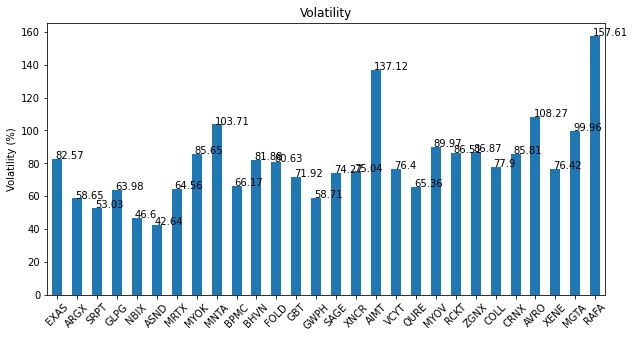

In [12]:
# Volatility
ax = round(log_returns_df.std() * 260 ** 0.5 * 100, 2).plot(figsize = (10, 5), kind = "bar")
plt.title("Volatility")
plt.ylabel("Volatility (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.1))

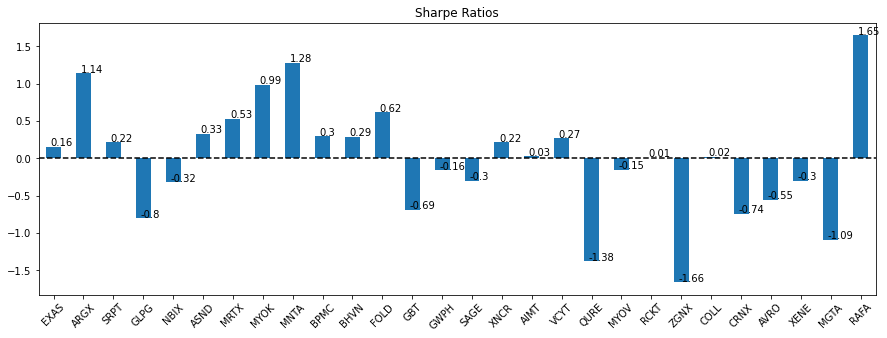

In [13]:
# Sharpe Ratio
ax = round(log_returns_df.mean(axis = 0) / log_returns_df.std(axis = 0) * 252 ** 0.5, 
           2).plot(kind="bar", figsize = (15, 5))

plt.title("Sharpe Ratios")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.01))


## Prepare data for BL model -- views, priors, posteriors

In [14]:
# data prep for next step
# fund weights
fund_weights = holdings['pct_portfolio']
fund_weights.index = holdings['ticker']
fund_weights.drop(labels=[x for x in fund_weights.index if x not in log_returns_df.columns], inplace=True)
fund_weights.reindex(list(log_returns_df.columns))
fund_weights = fund_weights.divide(sum(fund_weights))  # normalize weights


# market cap 
market_cap = holdings['market cap ($B)']
market_cap.index = holdings['ticker']
market_cap.drop(labels=[x for x in market_cap.index if x not in log_returns_df.columns], inplace=True)
market_cap = market_cap.apply(lambda x: float(x))
market_cap.reindex(list(log_returns_df.columns))
market_cap_weighted = market_cap.divide(sum(market_cap))

In [17]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

rf_rate = 0.0066  # as of September 2020
market_prices = get_data_for_multiple_stocks(['^NBI'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))['^NBI']['Adj Close']
delta = black_litterman.market_implied_risk_aversion(market_prices, risk_free_rate=rf_rate)
print(f'based on the risk-free rate of {rf_rate}, the market price of risk is {delta}')

0/1
based on the risk-free rate of 0.0066, the market price of risk is 1.6174112356637602


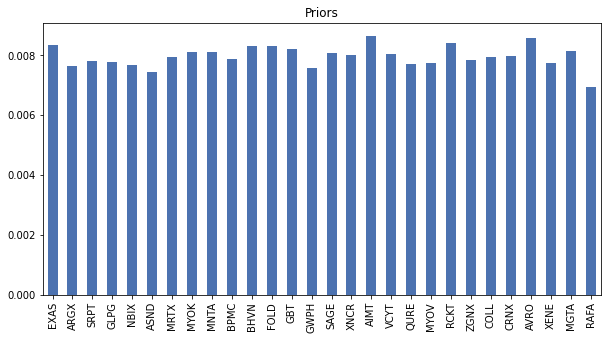

In [18]:
rets = np.exp(log_returns_df.T.to_numpy()) - 1
cov = np.cov(rets)

# pypfopt requires cov matrix to be a pandas DataFrame
cov_df = pd.DataFrame(cov, index=log_returns_df.columns, columns=log_returns_df.columns)

# prior returns based on the market returns and how much each asset contributes to it (i.e market cap weighted)
priors = black_litterman.market_implied_prior_returns(market_cap, delta, cov_df, risk_free_rate=rf_rate)
priors.plot(kind='bar', figsize=(10, 5), title='Priors')

In [19]:
# target prices as of September 2020

EUR_USD = 1.17  # EUR-USD exchange rate as of September 2020

target_prices = {'EXAS': 116.86, 'ARGX': 232.65 * EUR_USD, 'SRPT': 193.15, 'GLPG': 136.6 * EUR_USD,
                 'NBIX': 141.18, 'ASND': 153.38 * EUR_USD, 'MRTX': 155.62, 'MYOK': 137.45, 
                 'BPMC': 102, 'BHVN': 85.44, 'FOLD': 20.09,
                 'GBT': 110.59, 'GWPH': 190.69, 'SAGE': 79.29,
                 'XNCR': 44.7, 'AIMT': 33.32, 'VCYT': 37.4, 'QURE': 62.42 * EUR_USD,
                 'MYOV': 30.86, 'RCKT': 35.70, 'ZGNX': 48.00, 'COLL': 27.25,
                 'CRNX': 36.75, 'AVRO': 34.86, 'XENE': 23.57,
                 'MGTA': 18.5, 'MNTA': 18.5}

pred_returns = pd.Series()
for ticker, target_price in target_prices.items():
    end_price = adj_close_df[ticker][-1]
    pred_return = target_price / end_price - 1  # simple returns
    pred_returns.loc[ticker] = pred_return

pred_returns.sort_values(ascending=False)

MGTA    1.720588
AVRO    1.677419
ZGNX    1.677077
CRNX    1.345246
MYOV    1.196441
XENE    1.129178
GBT     1.005622
QURE    0.982932
GWPH    0.958808
RCKT    0.561680
NBIX    0.468178
FOLD    0.422805
SRPT    0.375418
BHVN    0.314259
COLL    0.308838
SAGE    0.297284
ASND    0.162873
XNCR    0.152359
VCYT    0.151123
EXAS    0.146248
GLPG    0.126221
BPMC    0.100324
ARGX    0.036875
MYOK    0.008215
AIMT   -0.032801
MRTX   -0.062812
MNTA   -0.647485
dtype: float64

In [20]:
# check which do not have views
[s for s in priors.index if s not in target_prices.keys()]

['RAFA']

In [21]:
confidences = pd.Series([0.5 if p <= 0.5 else 0.3 for p in pred_returns], index=pred_returns.index)
views = pred_returns.to_dict()

# if omega=None, view uncertainty defaulted to asset variance
bl = BlackLittermanModel(cov_df, pi=priors, absolute_views=views, risk_free_rate=rf_rate,
                         omega='idzorek', view_confidences=confidences)
                        

# posterior estimates for bl returns
post_ret = bl.bl_returns()  
post_ret.sort_values(ascending=False)

MGTA    0.742870
AVRO    0.677754
ZGNX    0.630494
CRNX    0.577192
MYOV    0.553518
XENE    0.541922
FOLD    0.499263
GBT     0.485607
RCKT    0.474511
QURE    0.450939
BHVN    0.407301
SRPT    0.370755
XNCR    0.353027
GWPH    0.347951
SAGE    0.321109
NBIX    0.311052
EXAS    0.306686
VCYT    0.295913
BPMC    0.259081
GLPG    0.245066
AIMT    0.241350
MYOK    0.235624
COLL    0.234561
ASND    0.190645
MRTX    0.178651
ARGX    0.167807
RAFA    0.034968
MNTA   -0.033138
dtype: float64

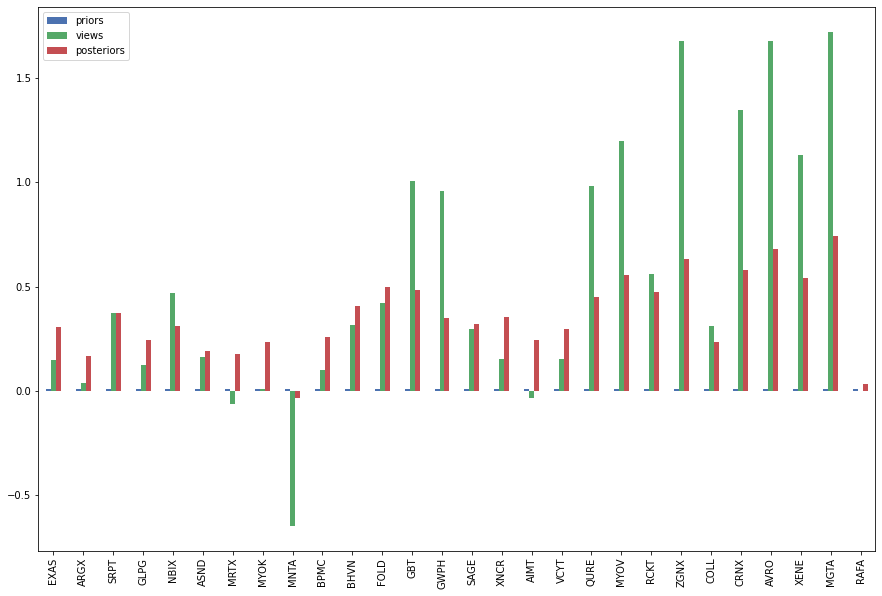

In [22]:
# visualising priors, views and posteriors
bl_df = pd.DataFrame([priors, pred_returns, post_ret]).T
bl_df.columns = ['priors', 'views', 'posteriors']
bl_df.plot(kind='bar', figsize=(15, 10))

In [23]:
# calculate benchmark return
IBB = get_data_for_multiple_stocks(['IBB'], dt.date(2020, 1, 1), dt.date(2020, 9, 30))['IBB']['Adj Close']

benchmark_ret = IBB[-1] / IBB[0] - 1
benchmark_ret

0/1


0.12588956164777043

In [24]:
import cvxpy as cvx

# returns series

# convert to simple returns, since our 'views' are calculated as simple returns
returns = np.exp(log_returns_df.T.to_numpy()) - 1

# no. of weights to optimize 
m = returns.shape[0]

# cov matrix
cov = np.cov(returns)

x = cvx.Variable(m)

# get portfolio variance from covariance matrix and candidate weights
portfolio_variance = cvx.quad_form(x, cov)

# total returns for obj func
bl_approach = True
if bl_approach:
    exp_ret = post_ret  # using posterior returns from BL model
else:
    exp_ret = updated_returns  # using SML method

portfolio_total_return = sum(cvx.multiply(exp_ret, x))  # weighted avg of asset returns

#objective function
returns_scale = 0.001
objective = cvx.Minimize(portfolio_variance - returns_scale*portfolio_total_return)

# setting up constraint to limit amt invested by market cap
bin_1 = np.where(market_cap > 10, 1, 0)
bin_2 = np.where((market_cap > 2) & (market_cap <= 10), 1, 0)
bin_3 = np.where((market_cap <= 2), 1, 0)
A = np.asmatrix([bin_1, bin_2, bin_3])
bounds = np.asmatrix([0.1, 0.6, 0.3])
A_mod = A - bounds.T

VaR_max = 0.2
constraints = [x >= 0,
               sum(x) == 1, 
               x <= 0.2,
               A_mod@x.T <= 0,
               portfolio_total_return >= benchmark_ret,  # only accept returns greater than this
               portfolio_variance <= np.power(VaR_max / 1.66, 2)  # only tolerate portfolio variance less than this
              ] 

problem = cvx.Problem(objective, constraints)

result = problem.solve()

# optimised weights
weights = round(pd.Series(x.value, index=log_returns_df.columns), 3)
weights.sort_values(ascending=False)

ASND    0.199
XENE    0.119
GWPH    0.113
NBIX    0.112
GLPG    0.100
QURE    0.089
MYOV    0.077
ZGNX    0.068
CRNX    0.051
RAFA    0.043
ARGX    0.019
MGTA    0.010
VCYT    0.000
MYOK    0.000
SRPT    0.000
AVRO    0.000
COLL    0.000
RCKT    0.000
MRTX    0.000
MNTA    0.000
AIMT    0.000
BPMC    0.000
BHVN    0.000
FOLD    0.000
GBT     0.000
SAGE    0.000
XNCR    0.000
EXAS    0.000
dtype: float64

In [25]:
import pickle 
from pathlib import Path

opt_weights_path = Path(r'/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/optimised_weights_analyst_2020.pickle')
with open(opt_weights_path, 'wb') as handle:
    pickle.dump(weights, handle)

In [26]:
# check assigned weights by market cap
holdings.dropna(subset=['market cap ($B)'], inplace=True)
holdings['market_cap_classification'] = holdings['market cap ($B)'].apply(lambda x: 1 if float(x) <= 2
                                                                         else 2 if float(x) <= 10 else 3)


# check weights for market cap
weighted_mcap = holdings.merge(weights.rename("weights"), how='inner', left_on='ticker', right_index=True)
weighted_mcap.groupby(by=['market_cap_classification']).sum()['weights']

market_cap_classification
1    0.3
2    0.6
3    0.1
Name: weights, dtype: float64

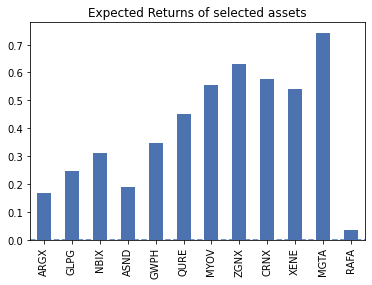

In [27]:
selected = weights[weights > 0].index
exp_ret[selected].plot(kind='bar', title='Expected Returns of selected assets')
plt.axhline(0, linestyle='--')

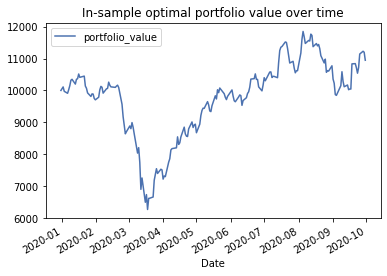

In [28]:
# portfolio value over time
initial_investment = 10000
num_shares = np.divide(weights * initial_investment, adj_close_df.iloc[0])
opt_pf_df = pd.DataFrame(index=adj_close_df.index)
opt_pf_df['portfolio_value'] = np.dot(num_shares, adj_close_df.T)
opt_pf_df.plot(title='In-sample optimal portfolio value over time')

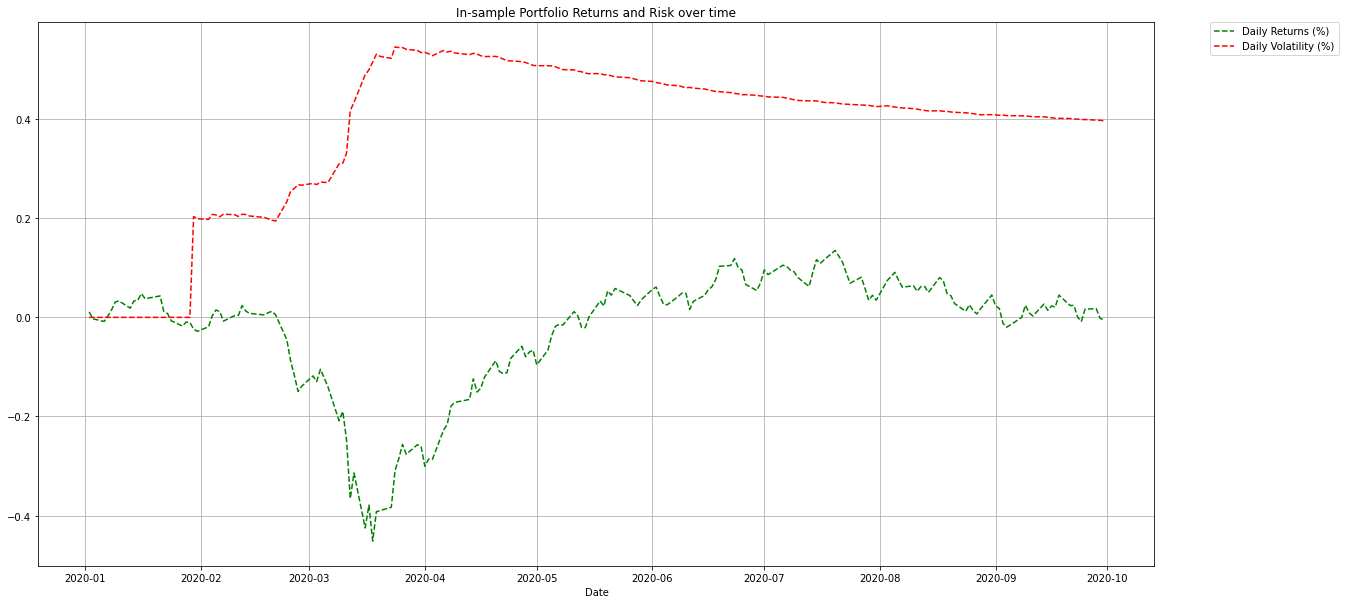

In [29]:
# portfolio return and volatility
pf_returns = np.dot((np.exp(log_returns_df) - 1), weights)
pf_log_returns = pd.Series(np.log(1 + pf_returns))
pf_volatility = pd.Series(pf_log_returns).expanding(20).apply(lambda x: np.sqrt(260) * np.std(x)).fillna(0)

plt.figure(figsize=(20, 10))
plt.plot(log_returns_df.index, pf_log_returns.expanding(0).apply(lambda x: sum(x)), 'g--', label='Daily Returns (%)')
plt.plot(log_returns_df.index, pf_volatility, 'r--', label='Daily Volatility (%)')
plt.grid(True)
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('In-sample Portfolio Returns and Risk over time')

plt.show()

In [30]:
# 1-2. portfolio returns based on adjusted returns, using ETIHX fund weights

assert all(fund_weights.index == exp_ret.index)
returns = np.dot(fund_weights, exp_ret)
variance = np.dot(fund_weights, np.dot(fund_weights, cov))

print(f'ETIHX portfolio returns: {returns}')
print(f'ETIHX portfolio risk: {variance}')

ETIHX portfolio returns: 0.3446140417164771
ETIHX portfolio risk: 0.0008881901684732213


In [31]:
# 1-2. portfolio returns based on adjusted returns, using optimised weights

assert all(weights.index == exp_ret.index)
returns = np.dot(weights, exp_ret)
variance = np.dot(weights, np.dot(weights, cov))

print(f'Optimal portfolio returns: {returns}')
print(f'Optimal portfolio risk: {variance}')

Optimal portfolio returns: 0.3682753684974284
Optimal portfolio risk: 0.000594817653215781


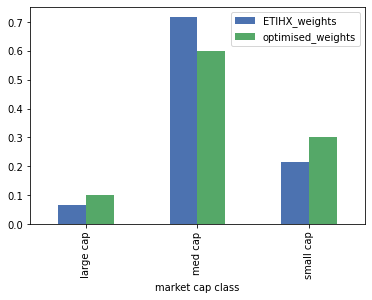

In [32]:
# 3. compare allocation by market cap weights
weights.name = 'optimised_weights'
best = holdings[['ticker', 'market cap ($B)']]
compare = best.merge(weights, how='left', left_on='ticker', right_index=True)
compare = compare.merge(fund_weights.rename("ETIHX_weights"), how='left', left_on='ticker', right_index=True)

# grp by market cap
compare['market cap class'] = compare['market cap ($B)'].apply(lambda x: 'small cap' if float(x) <= 2
                                                               else 'med cap' if float(x) <= 10 else 'large cap')

compare.groupby(by='market cap class').sum()[['ETIHX_weights', 'optimised_weights']].plot(kind='bar')

# Getting risk and returns

In [33]:
# Get index data
index_data = get_data_for_multiple_stocks(['^NBI'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))
index_log_returns_df = get_df_by_metric(index_data, 'log_return')
index_weights = pd.Series([1], index=['^NBI'])

0/1


In [34]:
def get_returns_risk_sharpe(returns_data, weights, rf_rate,
                            plot_returns=False, portfolio_name=""):
    '''
    returns_data is a pd.DataFrame containing the log returns for the various assets in the portfolio
    weights is a pd.Series containing the percentage of each holding
    plot_returns: set to True to show plot of portfolio value over time
    rf_rate: the annualised risk free rate for the period of the returns
    
    this function calculates the annualised returns (in excess of risk free rate), \
        risk and sharpe ratio
    '''
    
    if not all(returns_data.columns == weights.index):
        print ('please align the indexes for weights and returns data')
        return
    
    n_days = returns_data.shape[0]
    
    # portfolio return
    returns = np.dot(weights, np.exp(returns_data.T.values) - 1)  # portfolio simple returns
    print(returns)
    
    compounded_returns = np.cumprod(1 + returns)
    final_return = compounded_returns[-1]

    
    return_daily = np.exp(np.log(final_return) / n_days) - 1
    return_yearly = (1 + return_daily) ** 252 - 1
    return_yearly -= rf_rate
    
    # portfolio variance
    sd = np.std(returns)
    annualised_sd = np.sqrt(252) * sd
        
    sharpe_ratio = return_yearly / annualised_sd
    
    if plot_returns:
        plt.figure(figsize=(20, 10))
        plt.plot(returns_data.index, compounded_returns, 'r--', label='returns')
        plt.axhline(y=1, color='black', linestyle='--')
        plt.grid(True)
        plt.ylabel(f'Portfolio Value')
        plt.xlabel('Date')
        plt.title(f"{portfolio_name} Portfolio Value over Time")
        plt.show()

    return return_yearly, annualised_sd, sharpe_ratio

In [35]:
import pickle
from pathlib import Path

optimised_weights_path = Path(r"/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/optimised_weights_analyst_2020.pickle")
with open(optimised_weights_path, 'rb') as handle:
    optimised_weights = pickle.load(handle)

optimised_weights.sort_values(ascending=False)

ASND    0.199
XENE    0.119
GWPH    0.113
NBIX    0.112
GLPG    0.100
QURE    0.089
MYOV    0.077
ZGNX    0.068
CRNX    0.051
RAFA    0.043
ARGX    0.019
MGTA    0.010
VCYT    0.000
MYOK    0.000
SRPT    0.000
AVRO    0.000
COLL    0.000
RCKT    0.000
MRTX    0.000
MNTA    0.000
AIMT    0.000
BPMC    0.000
BHVN    0.000
FOLD    0.000
GBT     0.000
SAGE    0.000
XNCR    0.000
EXAS    0.000
dtype: float64

[ 1.10360438e-02 -1.36953274e-02 -5.47748893e-03  1.08361684e-02
  1.27929817e-02  1.61177850e-02  1.99407503e-03 -1.45121453e-02
  1.47962209e-02  1.01132157e-03  1.39057572e-02 -1.04118933e-02
  5.71123722e-03 -3.08970954e-02 -4.09548723e-03 -1.46111946e-02
 -1.05226557e-02  8.02641004e-03 -7.66355834e-04 -1.32373566e-02
 -4.61497999e-03  9.26814628e-03  2.25886967e-02  1.16341493e-02
 -3.25457812e-03 -1.90520753e-02  1.12394979e-02  3.87630965e-04
  1.99418954e-02 -1.11182759e-02 -4.43075764e-03 -3.21971610e-03
  4.53077511e-03  2.79749377e-03 -7.28206010e-03 -4.89672400e-02
 -4.14776405e-02 -2.86853761e-02 -3.21374440e-02  1.06542652e-02
  2.10221643e-02 -1.13313413e-02  2.50194813e-02 -1.69883279e-02
 -1.79799335e-02 -6.61654639e-02  1.87649094e-02 -5.58634098e-02
 -1.11481374e-01  5.30007939e-02 -1.05046667e-01  4.71133405e-02
 -6.99533543e-02  6.10676591e-02  2.22464228e-03  6.81709533e-03
  7.69669844e-02  2.38007395e-02  2.95978902e-02 -1.97662992e-02
  1.95015641e-02 -4.17437

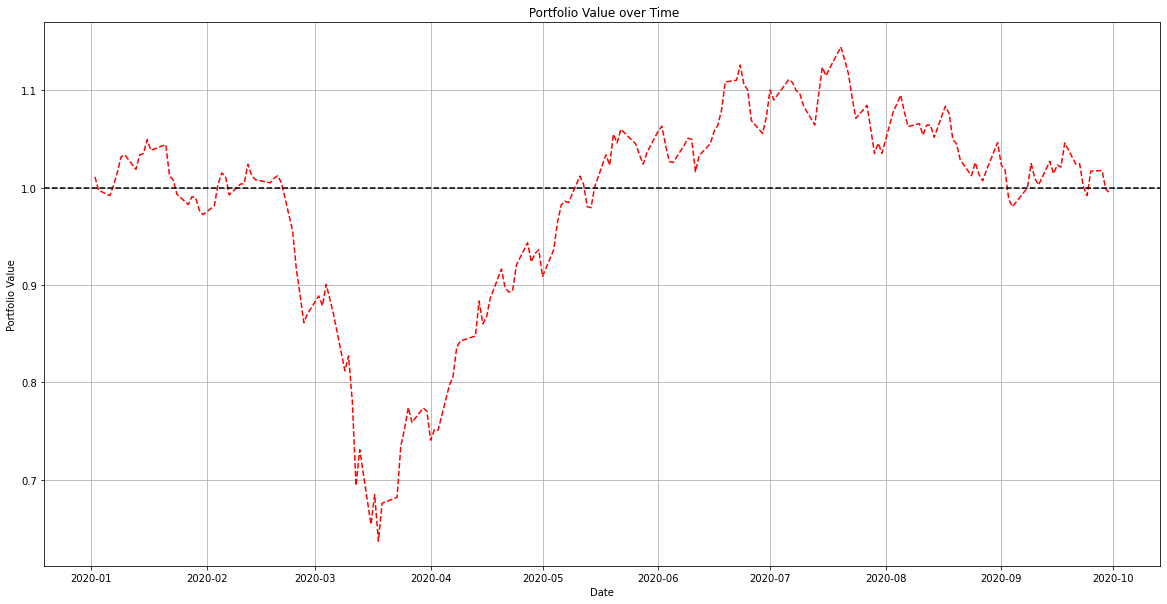

(-0.01361558393899282, 0.3861359325497811, -0.03526111607662279)

In [36]:
optimal_portfolio_stats = get_returns_risk_sharpe(log_returns_df, optimised_weights, rf_rate, True)
optimal_portfolio_stats

Optimal portfolio -- Annualised return: -0.0136, Annualised s.d: 0.3856, Sharpe Ratio: -0.0353

In [37]:
tickers

0     EXAS
1     ARGX
2     SRPT
3     GLPG
4     NBIX
5     ASND
6     MRTX
7     MYOK
8     MNTA
9     BPMC
10    BHVN
11    FOLD
12     GBT
13    GWPH
14    SAGE
15    BOLD
16    XNCR
17    AIMT
18    KRTX
19    VCYT
20    QURE
21    MYOV
22    RCKT
23    ZGNX
24    COLL
25    STML
26    CRNX
27    AVRO
28    XENE
29    MGTA
30    RAFA
Name: ticker, dtype: object

### Getting out of sample data to forecast for October 2020

In [38]:
start = dt.date(2020, 10 ,1)
end = dt.date(2020, 10, 31)

ETIHX_oos = get_data_for_multiple_stocks(tickers, start, end)

0/31
5/31
10/31
15/31
something went wrong with BOLD
20/31
25/31
something went wrong with STML
30/31


In [39]:
ETIHX_oos.pop("KRTX")

,Ticker,High,Low,Open,Close,Volume,Adj Close,Prev Close,daily_return,log_return
Date,,,,,,,,,,
2020-09-30,KRTX,79.478996,76.389999,79.160004,77.320000,355900,77.320000,NaN,NaN,NaN
2020-10-01,KRTX,80.900002,77.663002,78.250000,79.930000,267700,79.930000,77.320000,0.033756,0.033199
2020-10-02,KRTX,80.415001,75.660004,78.459999,75.870003,167900,75.870003,79.930000,-0.050794,-0.052130
2020-10-05,KRTX,81.980003,76.665001,76.760002,81.370003,156300,81.370003,75.870003,0.072492,0.069985
2020-10-06,KRTX,82.300003,79.400002,81.239998,80.209999,144600,80.209999,81.370003,-0.014256,-0.014359
2020-10-07,KRTX,80.209999,74.129997,77.900002,79.419998,295900,79.419998,80.209999,-0.009849,-0.009898
2020-10-08,KRTX,79.709999,77.625000,79.540001,77.839996,141300,77.839996,79.419998,-0.019894,-0.020095
2020-10-09,KRTX,80.449997,77.779999,78.250000,79.720001,142700,79.720001,77.839996,0.024152,0.023865
2020-10-12,KRTX,80.410004,78.445000,78.669998,79.160004,91100,79.160004,79.720001,-0.007025,-0.007049


In [40]:
index_oos = get_data_for_multiple_stocks(['^NBI'], start, end)

0/1


In [41]:
# risk free rate for October 2020
yield_df = pd.read_csv(r"/Users/bryankoh/Documents/GitHub/RiskAnalytics/Midterm Report/data/yield_rate_2020.csv")
yield_df.drop(yield_df.columns.difference(['Date','1 Yr']), 1, inplace=True)

yield_df['1 Yr'] = yield_df['1 Yr'].apply(lambda x: x / 100)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index("Date", inplace=True)
yield_df.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)
yield_df.head()

,risk_free_rate
Date,
2020-01-02,0.0156
2020-01-03,0.0155
2020-01-06,0.0154
2020-01-07,0.0153
2020-01-08,0.0155


In [42]:
yield_df = yield_df[yield_df.index > end_sep]

In [43]:
rf_rate_oct = yield_df['risk_free_rate'].mean()
rf_rate_oct

0.0012666666666666664

[-0.00023891 -0.01035695  0.04095471 -0.00464199  0.0178624  -0.00746342
 -0.002184   -0.0072528   0.00264071 -0.01785461 -0.00798939  0.00798321
 -0.00641602 -0.00405668 -0.01761914  0.01436677  0.02086746 -0.02106623
  0.00166504 -0.03434463  0.00822377 -0.00283417]


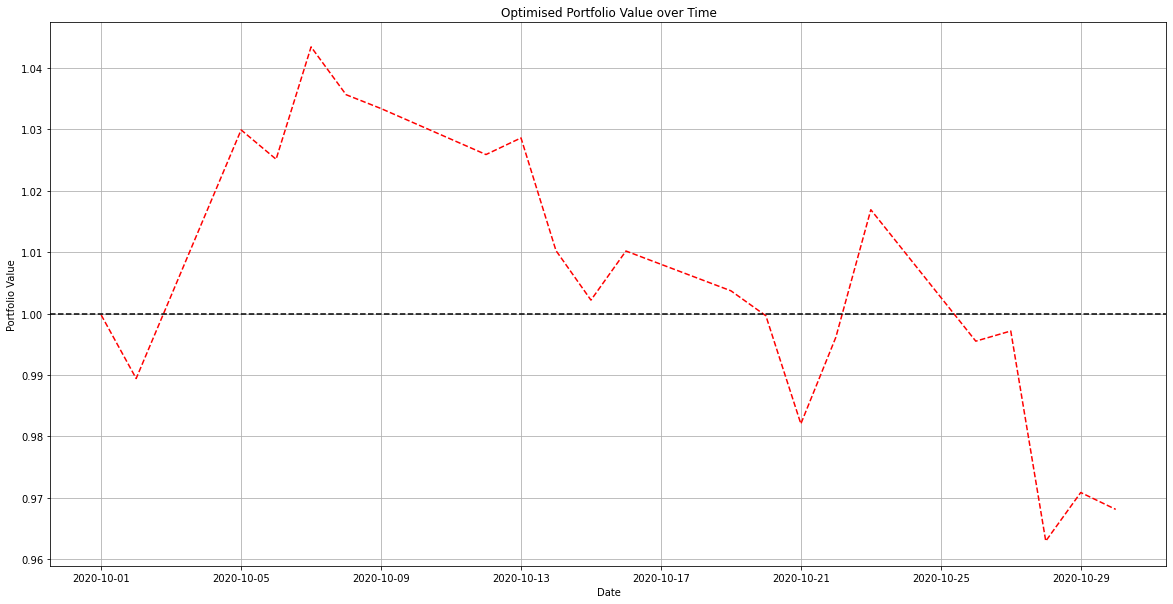

[ 0.00940863 -0.02189067  0.04394026 -0.01174946  0.02202782  0.00262003
  0.00796077  0.00728394  0.00487926 -0.01275986 -0.02327076  0.00494625
 -0.01806437 -0.00583771 -0.01598845  0.01340663  0.00261217 -0.00920396
  0.00518384 -0.02533817  0.00617783 -0.0213475 ]


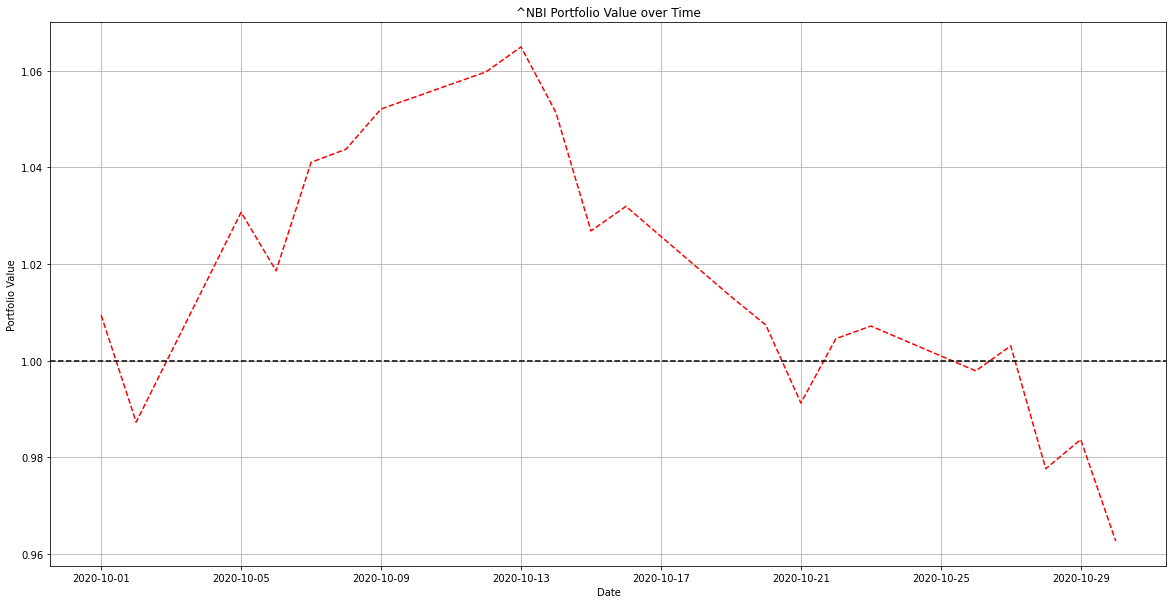

In [44]:
ETIHX_oos_returns = get_df_by_metric(ETIHX_oos, 'log_return')
ETIHX_oos_returns = ETIHX_oos_returns.fillna(0)
index_oos_returns = get_df_by_metric(index_oos, 'log_return')


# get oos stats
optimised_oos_stats = get_returns_risk_sharpe(ETIHX_oos_returns, optimised_weights, rf_rate_oct, True, 'Optimised')
index_oos_stats = get_returns_risk_sharpe(index_oos_returns, index_weights, rf_rate_oct, True, '^NBI')

In [45]:
# compile results
out_of_sample = pd.DataFrame([index_oos_stats, optimised_oos_stats],
                            columns=['return', 'std_dev', 'sharpe_ratio'],
                            index=['Index', 'optimal'])
out_of_sample

,return,std_dev,sharpe_ratio
Index,-0.354301,0.261985,-1.352370
optimal,-0.311705,0.247854,-1.257616
